In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))
import pickle
import os
import sys
import numpy as np
np.set_printoptions(suppress=True)
sys.path.insert(0, os.getcwd()+'/expansion_suite')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
from IPython.display import display, Math
with open('data/new_exp_suite_adj.pkl', 'rb') as f:
    res_new = pickle.load(f)
with open('data/new_elasticities.pkl', 'rb') as f:
    el_new = pickle.load(f)
exposure_1_new,exposure_2_new,exposure_3_new,exposure_4_new,exposure_5_new,exposure_6_new,price_1_new,price_2_new,price_3_new = el_new
with open('data/old_exp_suite_adj.pkl', 'rb') as f:
    res_old = pickle.load(f)
with open('data/old_elasticities.pkl', 'rb') as f:
    el_old = pickle.load(f)  
exposure_1_old,exposure_2_old,exposure_3_old,exposure_4_old,exposure_5_old,exposure_6_old,price_1_old,price_2_old,price_3_old = el_old
def disp(Lq, Var):
    Lq_disp = {'c': r'{:.5f}'.format(*Lq['c'].flatten().tolist()),\
    'x': r'\begin{{bmatrix}}{:.4f}&{:.4f}\end{{bmatrix}}Z_t^1'.format(*Lq['x'].flatten().tolist()),\
    'w':r'\begin{{bmatrix}}{:.4f}&{:.4f}\end{{bmatrix}}W_{{t+1}}'.format(*Lq['w'].flatten().tolist()),\
    'x2':r'\begin{{bmatrix}}{:.4f}&{:.4f}\end{{bmatrix}}Z_t^2'.format(*Lq['x2'].flatten().tolist()),\
    'xx':r'Z^{{1T}}_{{t}}\begin{{bmatrix}}{:.4f}&{:.4f}\\{:.4f}&{:.4f}\end{{bmatrix}}Z^1_{{t}}'.format(*Lq['xx'].flatten().tolist()),\
    'xw':r'Z^{{1T}}_{{t}}\begin{{bmatrix}}{:.4f}&{:.4f}\\{:.4f}&{:.4f}\end{{bmatrix}}W_{{t+1}}'.format(*Lq['xw'].flatten().tolist()),\
    'ww':r'W_{{t+1}}^{{T}}\begin{{bmatrix}}{:.4f}&{:.4f}\\{:.4f}&{:.4f}\end{{bmatrix}}W_{{t+1}}'.format(*Lq['ww'].flatten().tolist())}
    if (abs(Lq['c'].item())<1e-14) and abs(Lq['c'].item())!=0:
        Lq_disp.pop('c')
        Lq.coeffs.pop('c')
    Lq_disp = Var + '='+ '+'.join([Lq_disp[i] for i in ['c','x','w','x2','xx','xw','ww'] if i in Lq.coeffs])
    display(Math(Lq_disp))

# Adjustment Cost Model 

\begin{aligned}
\frac{C_t}{K_t}+\frac{I_t}{K_t} &=\alpha \\
\frac{K_{t+1}}{K_t} &=\left[1+\phi_2\left(\frac{I_t}{K_t}\right)\right]^{\phi_1} G_{t+1}\\
\log \mathbb{E}\left[\left(\frac{S_{t+1}}{S_t}\right)\left(\frac{M K_{t+1}}{M C_{t+1}}\right) \psi\left(\frac{I_t}{K_t}, G_{t+1}\right) \mid \mathfrak{F}_t\right]&=0\\
Z_{t+1}&=\mathbb{A} Z_t+\mathbb{B} W_{t+1}
\end{aligned}

- where $\psi\left(\frac{I_t}{K_t}, G_{t+1}\right)=\phi_1 \phi_2\left[1+\phi_2\left(\frac{I_t}{K_t}\right)\right]^{\phi_1-1} G_{t+1}$
- $G_{t+1} \equiv \exp \left(-\alpha_k+\mathbb{U}_k \cdot Z_t-\frac{1}{2}\left|\sigma_k\right|^2+\sigma_k \cdot W_{t+1}\right)$


$\gamma=10$, $\beta = 0.995$, $\alpha = 0.0355$

$\phi_1 = 0.0125$, $\phi_2=400$, $\alpha_k=0.025$

$\mathbb{U}_k=\begin{bmatrix}1&0\end{bmatrix}$ 

$\sigma_k=\begin{bmatrix}0.477&0\end{bmatrix}*0.01$ 

$\mathbb{A} = \begin{bmatrix}0.986&0\\0&0.998\end{bmatrix}$

$\mathbb{B}=\begin{bmatrix}0.011&0.025 \end{bmatrix}*0.01$



# State Evolution Equations

In [2]:
Var = r'\widehat{Z}_{{[1],t+1}}^1'
print('New Expansion Suite')
disp(res_new['Z1_tp1'][0].drop_scale(3),Var)
print(80*'-')
print('Old Expansion Suite')
disp(res_old['Z1_tp1'][0].drop_scale(3),Var)

New Expansion Suite


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Old Expansion Suite


<IPython.core.display.Math object>

In [3]:
Var = r'\widehat{Z}_{{[1],t+1}}^2'
print('New Expansion Suite')
disp(res_new['Z2_tp1'][0].drop_scale(3),Var)
print(80*'-')
print('Old Expansion Suite')
disp(res_old['Z2_tp1'][0].drop_scale(3),Var)

New Expansion Suite


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Old Expansion Suite


<IPython.core.display.Math object>

In [4]:
Var = r'\widehat{Z}_{{[2],t+1}}^1'
print('New Expansion Suite')
disp(res_new['Z1_tp1'][1].drop_scale(3),Var)
print(80*'-')
print('Old Expansion Suite')
disp(res_old['Z1_tp1'][1].drop_scale(3),Var)

New Expansion Suite


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Old Expansion Suite


<IPython.core.display.Math object>

In [5]:
Var = r'\widehat{Z}_{{[2],t+1}}^2'
print('New Expansion Suite')
disp(res_new['Z2_tp1'][1].drop_scale(3),Var)
print(80*'-')
print('Old Expansion Suite')
disp(res_old['Z2_tp1'][1].drop_scale(3),Var)

New Expansion Suite


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Old Expansion Suite


<IPython.core.display.Math object>

# Jump Variables

In [6]:
Var = r'\widehat{C}_t^1-\widehat{K}_t^1'
print('New Expansion Suite')
disp(res_new['X1_t'][0].drop_scale(3),Var)
print(80*'-')
print('Old Expansion Suite')
disp(res_old['X1_t'][2].drop_scale(3),Var)

New Expansion Suite


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Old Expansion Suite


<IPython.core.display.Math object>

In [7]:
Var = r'\widehat{C}_t^2-\widehat{K}_t^2'
print('New Expansion Suite')
disp(res_new['X2_t'][0].drop_scale(3),Var)
print(80*'-')
print('Old Expansion Suite')
disp(res_old['X2_t'][2].drop_scale(3),Var)

New Expansion Suite


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Old Expansion Suite


<IPython.core.display.Math object>

In [8]:
Var = r'\widehat{I}_t^1-\widehat{K}_t^1'
print('New Expansion Suite')
disp(res_new['X1_t'][1].drop_scale(3),Var)
print(80*'-')
print('Old Expansion Suite')
disp(res_old['X1_t'][3].drop_scale(3),Var)

New Expansion Suite


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Old Expansion Suite


<IPython.core.display.Math object>

In [9]:
Var = r'\widehat{I}_t^2-\widehat{K}_t^2'
print('New Expansion Suite')
disp(res_new['X2_t'][1].drop_scale(3),Var)
print(80*'-')
print('Old Expansion Suite')
disp(res_old['X2_t'][3].drop_scale(3),Var)

New Expansion Suite


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Old Expansion Suite


<IPython.core.display.Math object>

# Change of measure

In [10]:
Var = r'\log N'
print('New Expansion Suite')
disp(res_new['log_N'].drop_scale(3),Var)
print(80*'-')
print('Old Expansion Suite')
disp(res_old['log_M'][0].drop_scale(3),Var)

New Expansion Suite


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Old Expansion Suite


<IPython.core.display.Math object>

# Continuation Values

In [11]:
Var = r'\widehat{V}_t^1-\widehat{K}_t^1'
print('New Expansion Suite')
disp(res_new['util_sol']['vmc1_t'].drop_scale(3)+res_new['X1_t'][0].drop_scale(3),Var)
print(80*'-')
print('Old Expansion Suite')
disp(res_old['X1_t'][0].drop_scale(3)+res_old['X1_t'][2].drop_scale(3),Var)

New Expansion Suite


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Old Expansion Suite


<IPython.core.display.Math object>

In [12]:
Var = r'\widehat{V}_t^2-\widehat{K}_t^2'
print('New Expansion Suite')
disp(res_new['util_sol']['vmc2_t'].drop_scale(3)+res_new['X2_t'][0].drop_scale(3),Var)
print(80*'-')
print('Old Expansion Suite')
disp(res_old['X2_t'][0].drop_scale(3)+res_old['X2_t'][2].drop_scale(3),Var)

New Expansion Suite


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Old Expansion Suite


<IPython.core.display.Math object>

In [13]:
Var = r'\widehat{R}_t^1-\widehat{K}_t^1'
print('New Expansion Suite')
disp(res_new['util_sol']['rmc1_t'].drop_scale(3)+res_new['X1_t'][0].drop_scale(3),Var)
print(80*'-')
print('Old Expansion Suite')
disp(res_old['X1_t'][1].drop_scale(3)+res_old['X1_t'][2].drop_scale(3),Var)

New Expansion Suite


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Old Expansion Suite


<IPython.core.display.Math object>

In [14]:
Var = r'\widehat{R}_t^2-\widehat{K}_t^2'
print('New Expansion Suite')
disp(res_new['util_sol']['rmc2_t'].drop_scale(3)+res_new['X2_t'][0].drop_scale(3),Var)
print(80*'-')
print('Old Expansion Suite')
disp(res_old['X2_t'][1].drop_scale(3)+res_old['X2_t'][2].drop_scale(3),Var)

New Expansion Suite


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Old Expansion Suite


<IPython.core.display.Math object>

# Exposure Elasticity

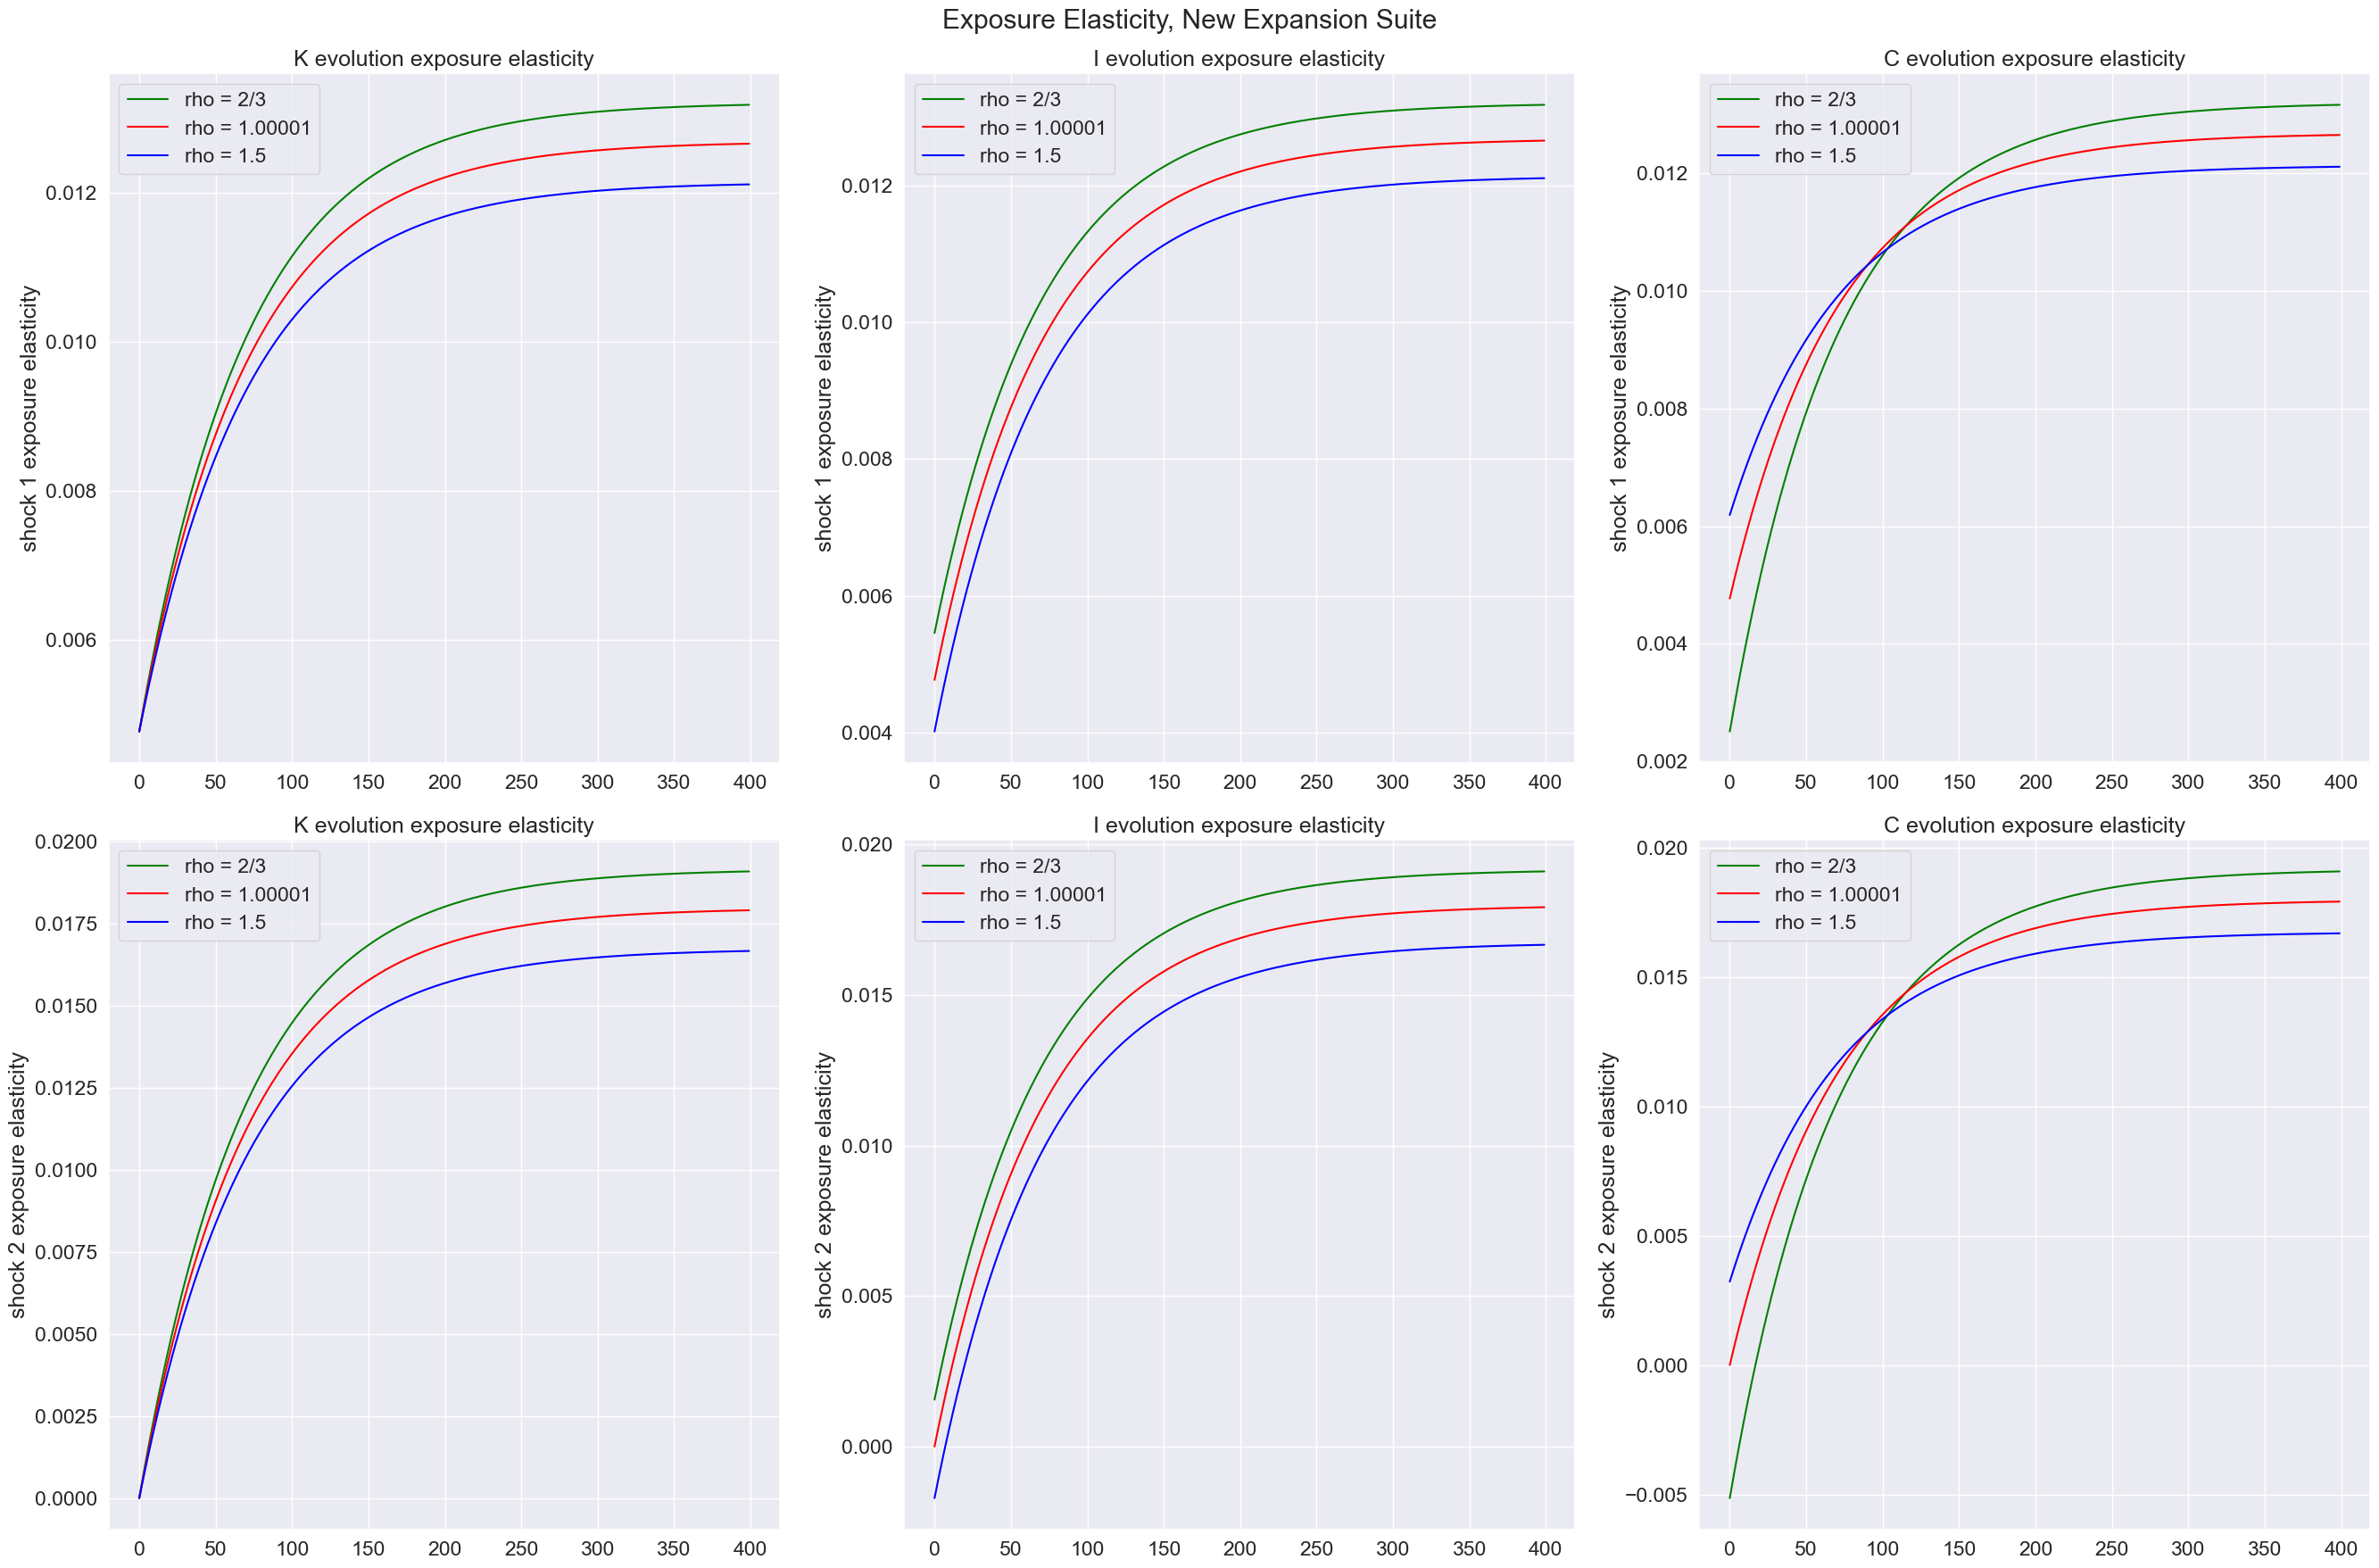

In [15]:
T = 400
fig, axes = plt.subplots(2,3,figsize = (27,18))

for i in range(3):
    for j in range(2):
        el = pd.DataFrame([np.arange(T),exposure_1_new[i][j].flatten(),exposure_2_new[i][j].flatten(),exposure_3_new[i][j].flatten()]).T
        el.columns = ['T','rho = 2/3', 'rho = 1.00001', 'rho = 1.5']
        sns.lineplot(data = el,  x = 'T', y = 'rho = 2/3', ax=axes[j,i], color = 'green',label = 'rho = 2/3')
        sns.lineplot(data = el,  x = 'T', y = 'rho = 1.00001', ax=axes[j,i], color = 'red',label = 'rho = 1.00001')
        sns.lineplot(data = el,  x = 'T', y = 'rho = 1.5', ax=axes[j,i], color = 'blue',label = 'rho = 1.5')
        axes[j,i].set_xlabel('')
        axes[0,i].set_ylabel('shock 1 exposure elasticity')
        axes[1,i].set_ylabel('shock 2 exposure elasticity')
        axes[j,0].set_title('K evolution exposure elasticity')
        axes[j,1].set_title('I evolution exposure elasticity')
        axes[j,2].set_title('C evolution exposure elasticity')

fig.suptitle('Exposure Elasticity, New Expansion Suite')
fig.tight_layout()

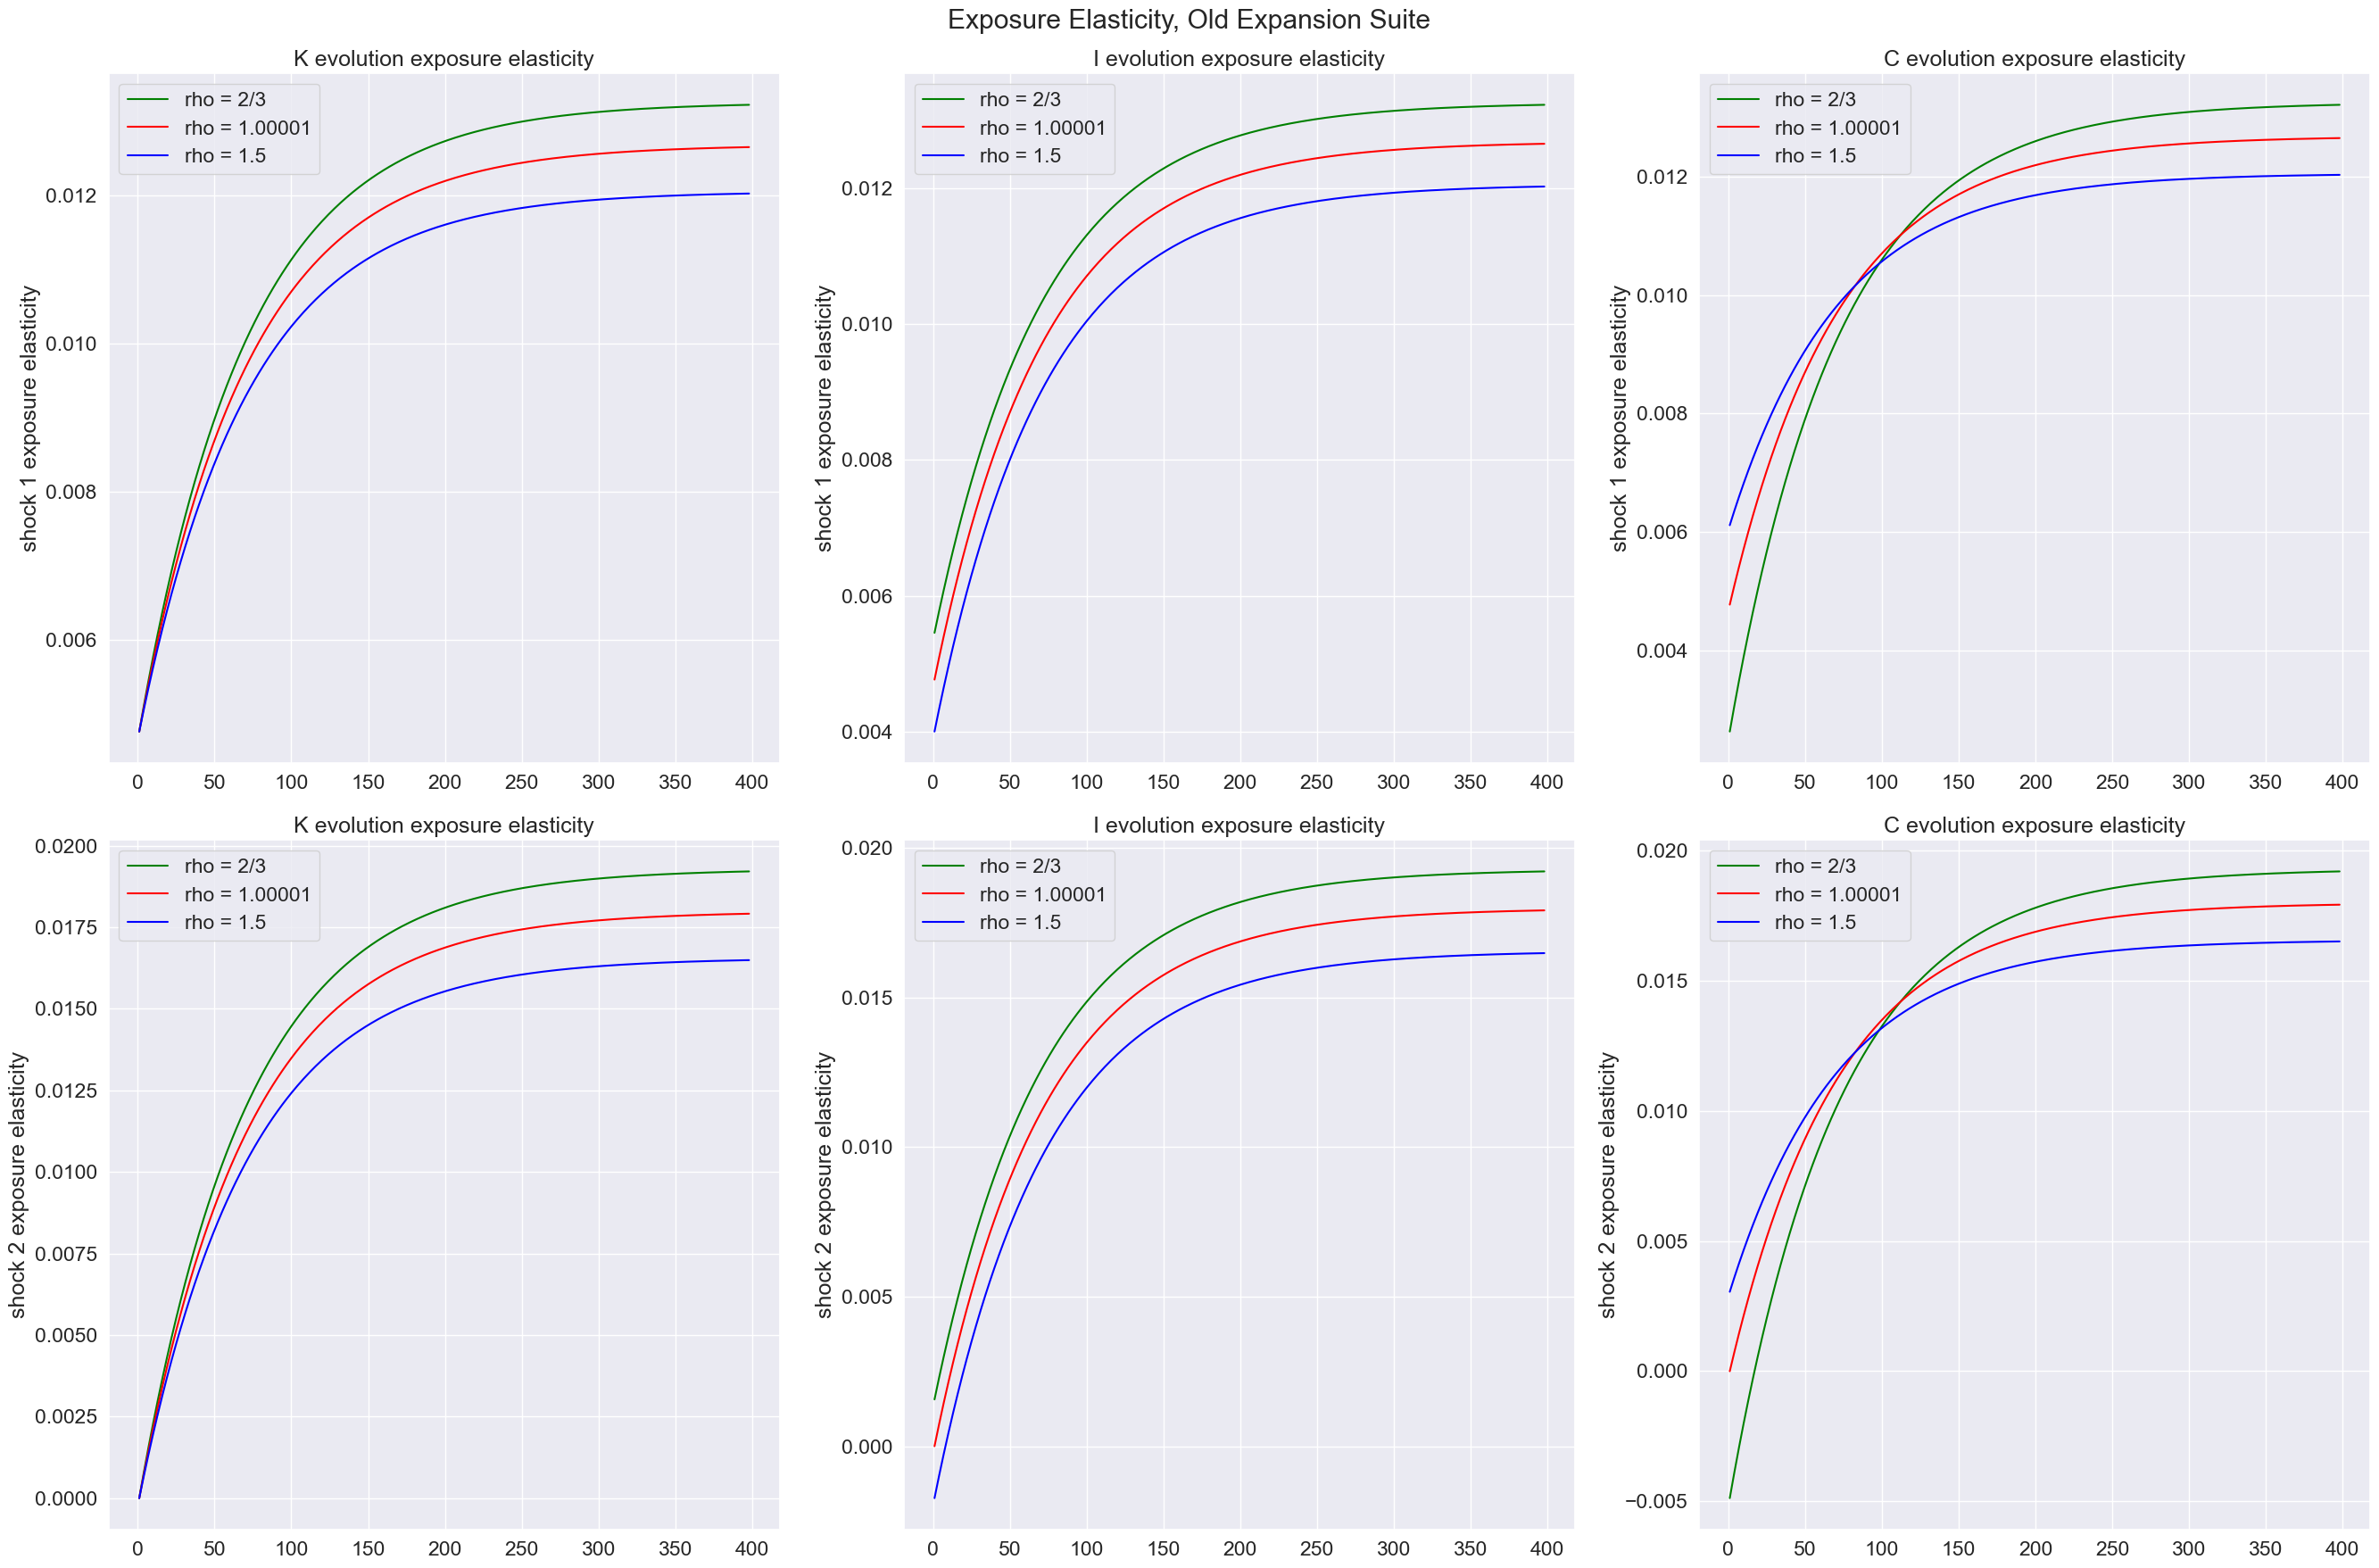

In [16]:
T = 400
fig, axes = plt.subplots(2,3,figsize = (27,18))

for i in range(3):
    for j in range(2):
        el = pd.DataFrame([np.arange(T-1),exposure_1_old[i][j].flatten(),exposure_2_old[i][j].flatten(),exposure_3_old[i][j].flatten()]).T[1:]
        el.columns = ['T','rho = 2/3', 'rho = 1.00001', 'rho = 1.5']
        sns.lineplot(data = el,  x = 'T', y = 'rho = 2/3', ax=axes[j,i], color = 'green',label = 'rho = 2/3')
        sns.lineplot(data = el,  x = 'T', y = 'rho = 1.00001', ax=axes[j,i], color = 'red',label = 'rho = 1.00001')
        sns.lineplot(data = el,  x = 'T', y = 'rho = 1.5', ax=axes[j,i], color = 'blue',label = 'rho = 1.5')
        axes[j,i].set_xlabel('')
        axes[0,i].set_ylabel('shock 1 exposure elasticity')
        axes[1,i].set_ylabel('shock 2 exposure elasticity')
        axes[j,0].set_title('K evolution exposure elasticity')
        axes[j,1].set_title('I evolution exposure elasticity')
        axes[j,2].set_title('C evolution exposure elasticity')

fig.suptitle('Exposure Elasticity, Old Expansion Suite')
fig.tight_layout()

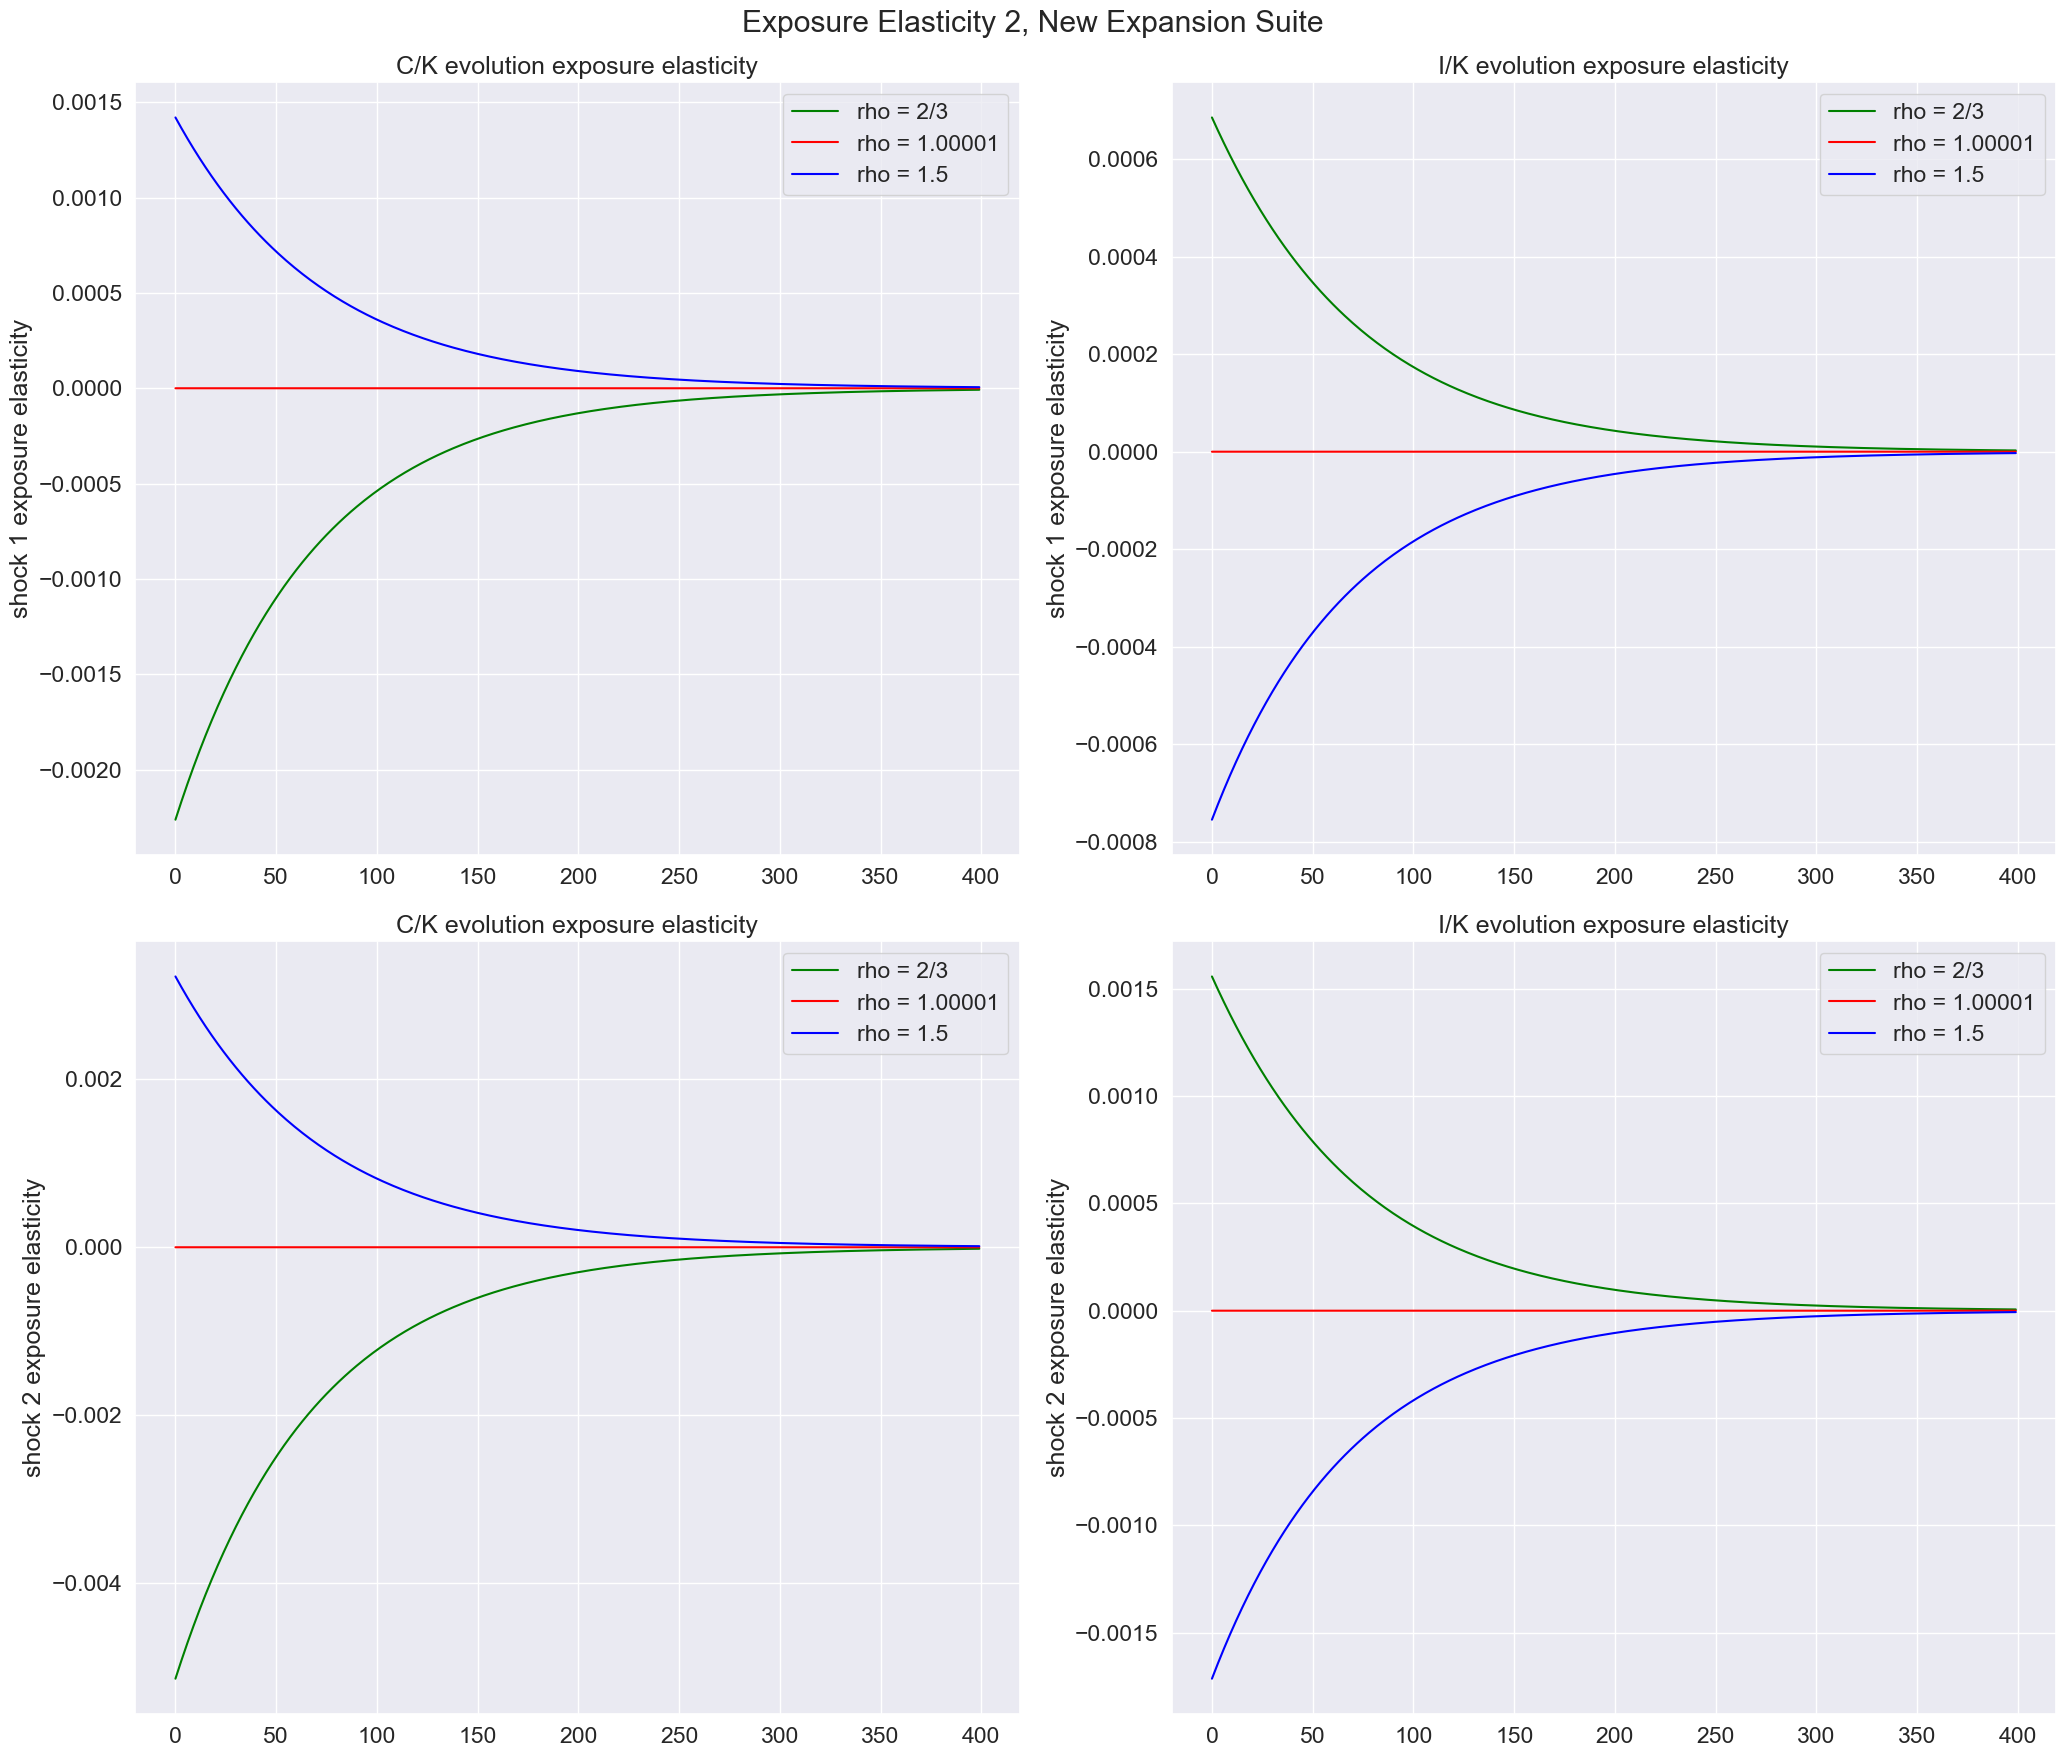

In [17]:
T = 400
fig, axes = plt.subplots(2,2,figsize = (21,18))

for i in range(2):
    for j in range(2):
        el = pd.DataFrame([np.arange(T),exposure_4_new[i][j].flatten(),exposure_5_new[i][j].flatten(),exposure_6_new[i][j].flatten()]).T
        el.columns = ['T','rho = 2/3', 'rho = 1.00001', 'rho = 1.5']
        sns.lineplot(data = el,  x = 'T', y = 'rho = 2/3', ax=axes[j,i], color = 'green',label = 'rho = 2/3')
        sns.lineplot(data = el,  x = 'T', y = 'rho = 1.00001', ax=axes[j,i], color = 'red',label = 'rho = 1.00001')
        sns.lineplot(data = el,  x = 'T', y = 'rho = 1.5', ax=axes[j,i], color = 'blue',label = 'rho = 1.5')
        axes[j,i].set_xlabel('')
        axes[0,i].set_ylabel('shock 1 exposure elasticity')
        axes[1,i].set_ylabel('shock 2 exposure elasticity')
        axes[j,0].set_title('C/K evolution exposure elasticity')
        axes[j,1].set_title('I/K evolution exposure elasticity')


fig.suptitle('Exposure Elasticity 2, New Expansion Suite')
fig.tight_layout()

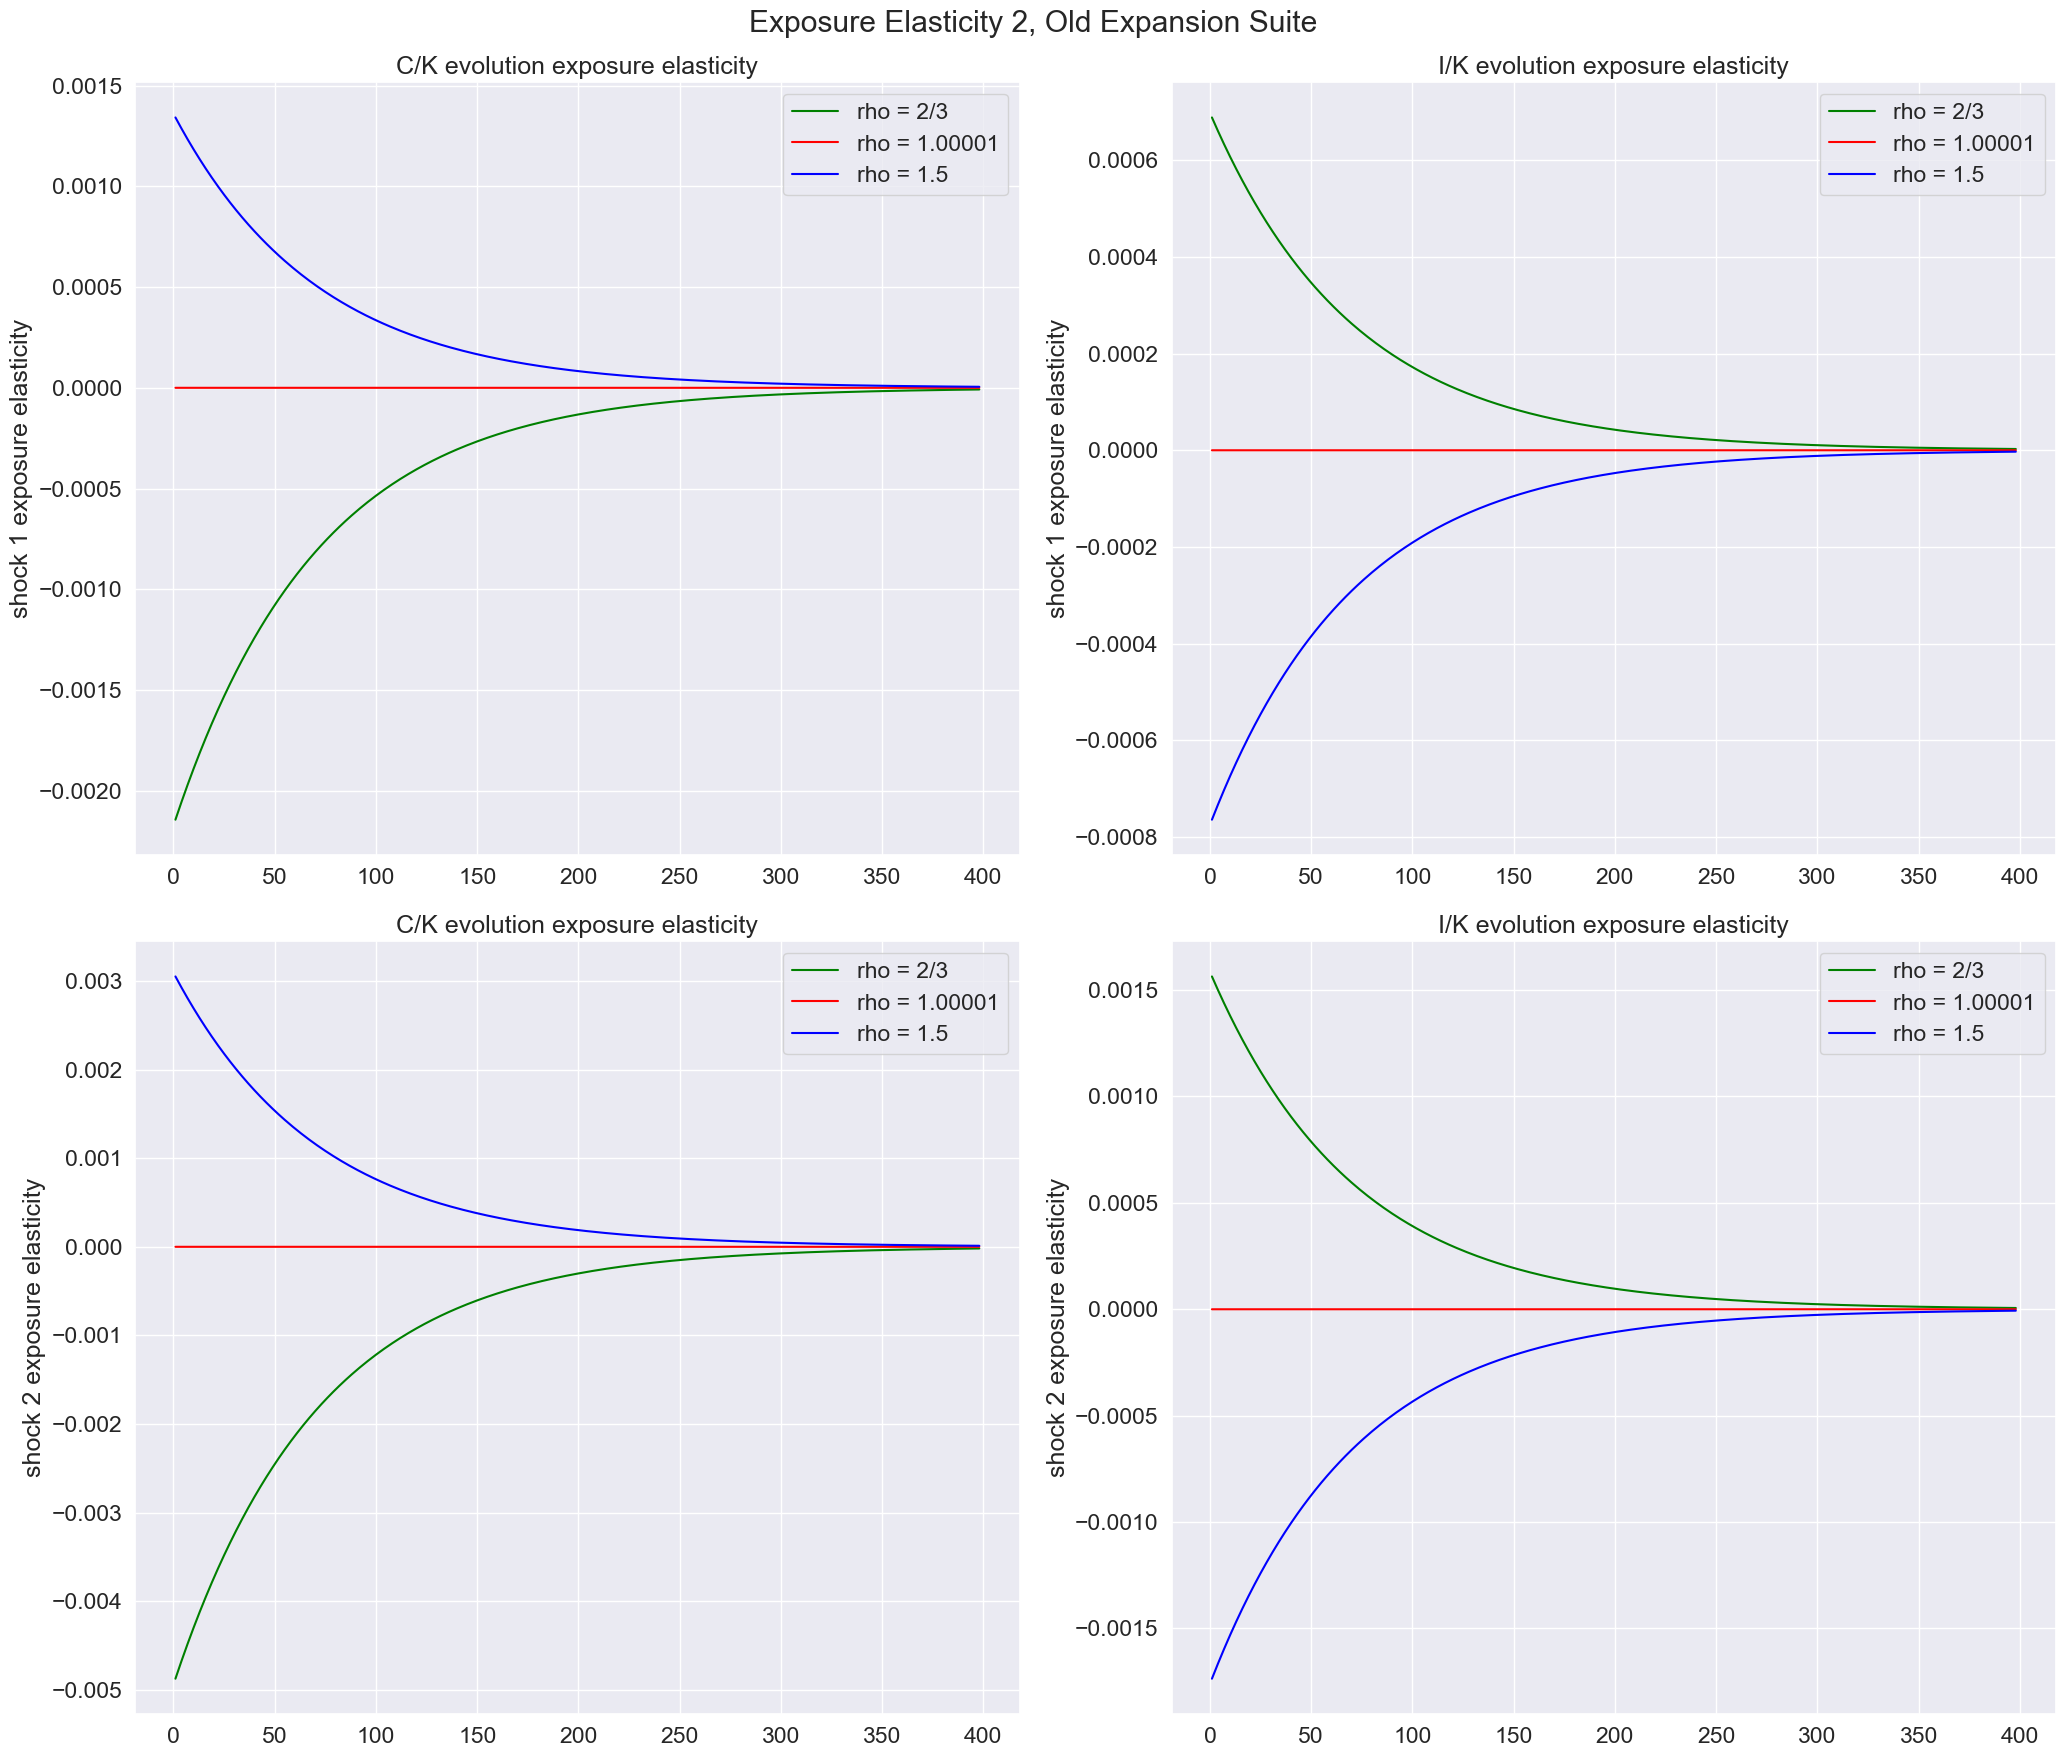

In [18]:
T = 400
fig, axes = plt.subplots(2,2,figsize = (21,18))

for i in range(2):
    for j in range(2):
        el = pd.DataFrame([np.arange(T-1),exposure_4_old[i][j].flatten(),exposure_5_old[i][j].flatten(),exposure_6_old[i][j].flatten()]).T[1:]
        el.columns = ['T','rho = 2/3', 'rho = 1.00001', 'rho = 1.5']
        sns.lineplot(data = el,  x = 'T', y = 'rho = 2/3', ax=axes[j,i], color = 'green',label = 'rho = 2/3')
        sns.lineplot(data = el,  x = 'T', y = 'rho = 1.00001', ax=axes[j,i], color = 'red',label = 'rho = 1.00001')
        sns.lineplot(data = el,  x = 'T', y = 'rho = 1.5', ax=axes[j,i], color = 'blue',label = 'rho = 1.5')
        axes[j,i].set_xlabel('')
        axes[0,i].set_ylabel('shock 1 exposure elasticity')
        axes[1,i].set_ylabel('shock 2 exposure elasticity')
        axes[j,0].set_title('C/K evolution exposure elasticity')
        axes[j,1].set_title('I/K evolution exposure elasticity')


fig.suptitle('Exposure Elasticity 2, Old Expansion Suite')
fig.tight_layout()

# Price Elasticity

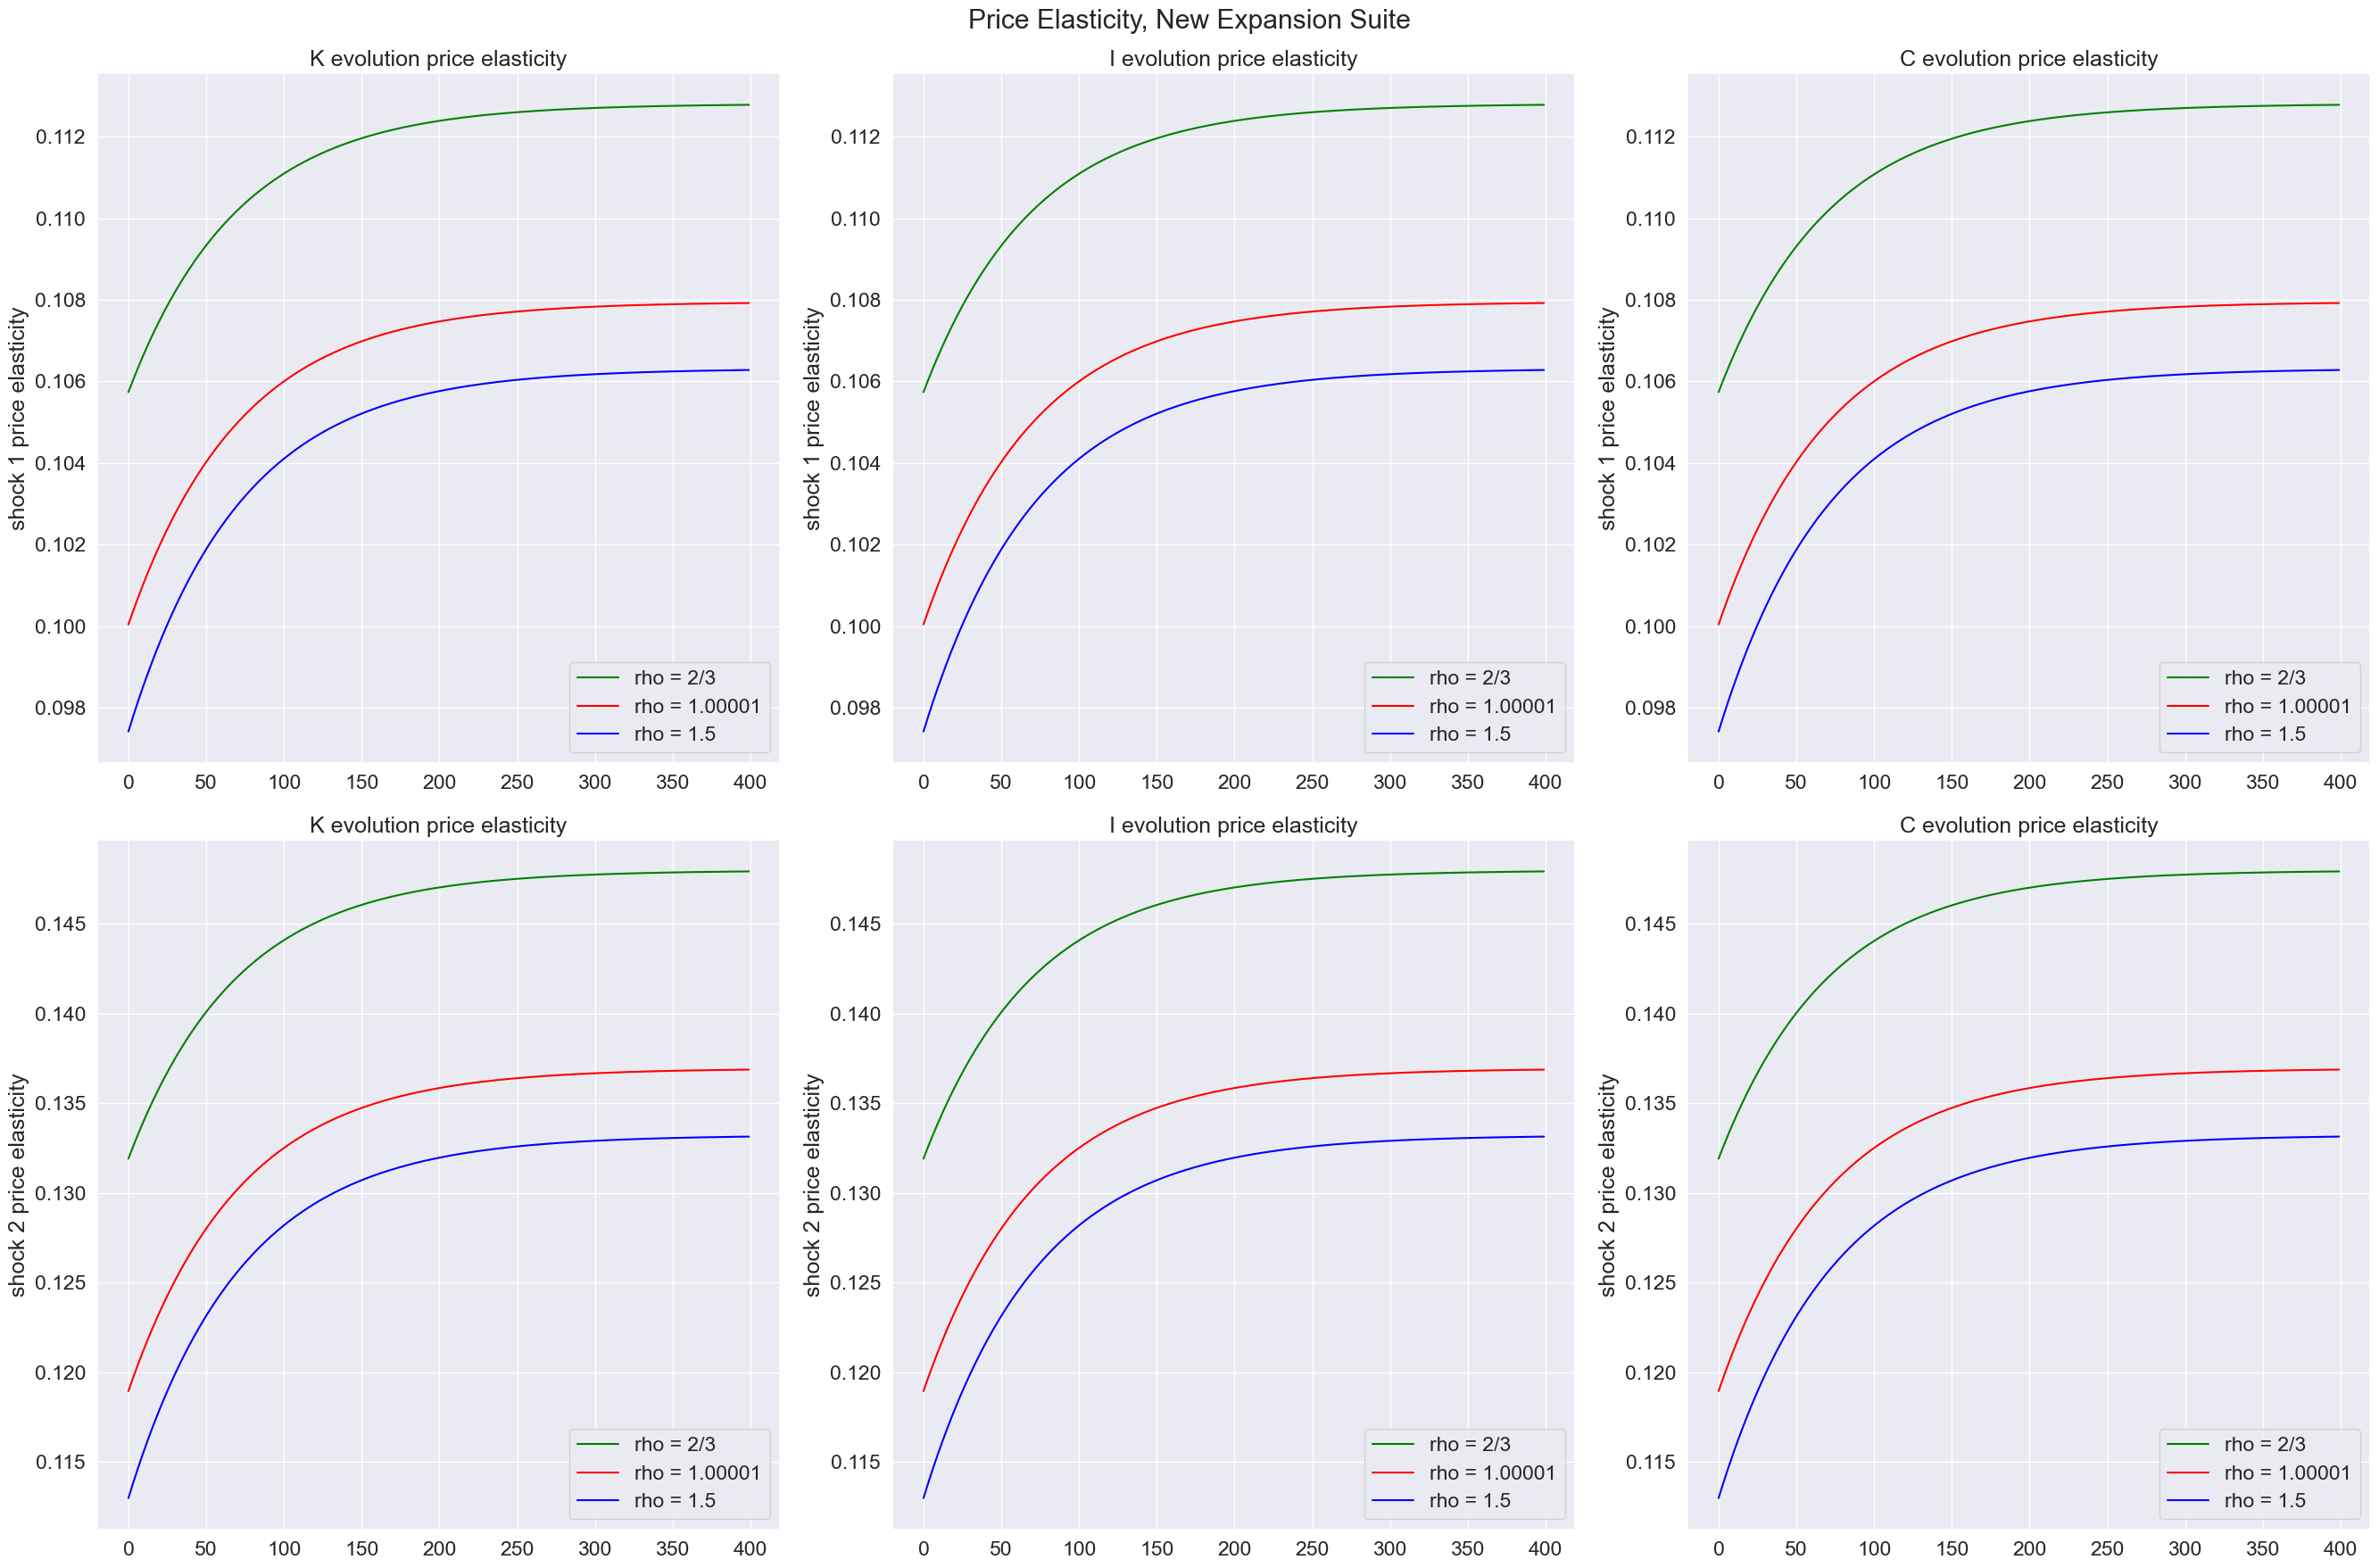

In [19]:
T = 400
fig, axes = plt.subplots(2,3,figsize = (27,18))

for i in range(3):
    for j in range(2):
        el = pd.DataFrame([np.arange(T),price_1_new[i][j].flatten(),price_2_new[i][j].flatten(),price_3_new[i][j].flatten()]).T
        el.columns = ['T','rho = 2/3', 'rho = 1.00001', 'rho = 1.5']
        sns.lineplot(data = el,  x = 'T', y = 'rho = 2/3', ax=axes[j,i], color = 'green',label = 'rho = 2/3')
        sns.lineplot(data = el,  x = 'T', y = 'rho = 1.00001', ax=axes[j,i], color = 'red',label = 'rho = 1.00001')
        sns.lineplot(data = el,  x = 'T', y = 'rho = 1.5', ax=axes[j,i], color = 'blue',label = 'rho = 1.5')
        axes[j,i].set_xlabel('')
        axes[0,i].set_ylabel('shock 1 price elasticity')
        axes[1,i].set_ylabel('shock 2 price elasticity')
        axes[j,0].set_title('K evolution price elasticity')
        axes[j,1].set_title('I evolution price elasticity')
        axes[j,2].set_title('C evolution price elasticity')

fig.suptitle('Price Elasticity, New Expansion Suite')
fig.tight_layout()

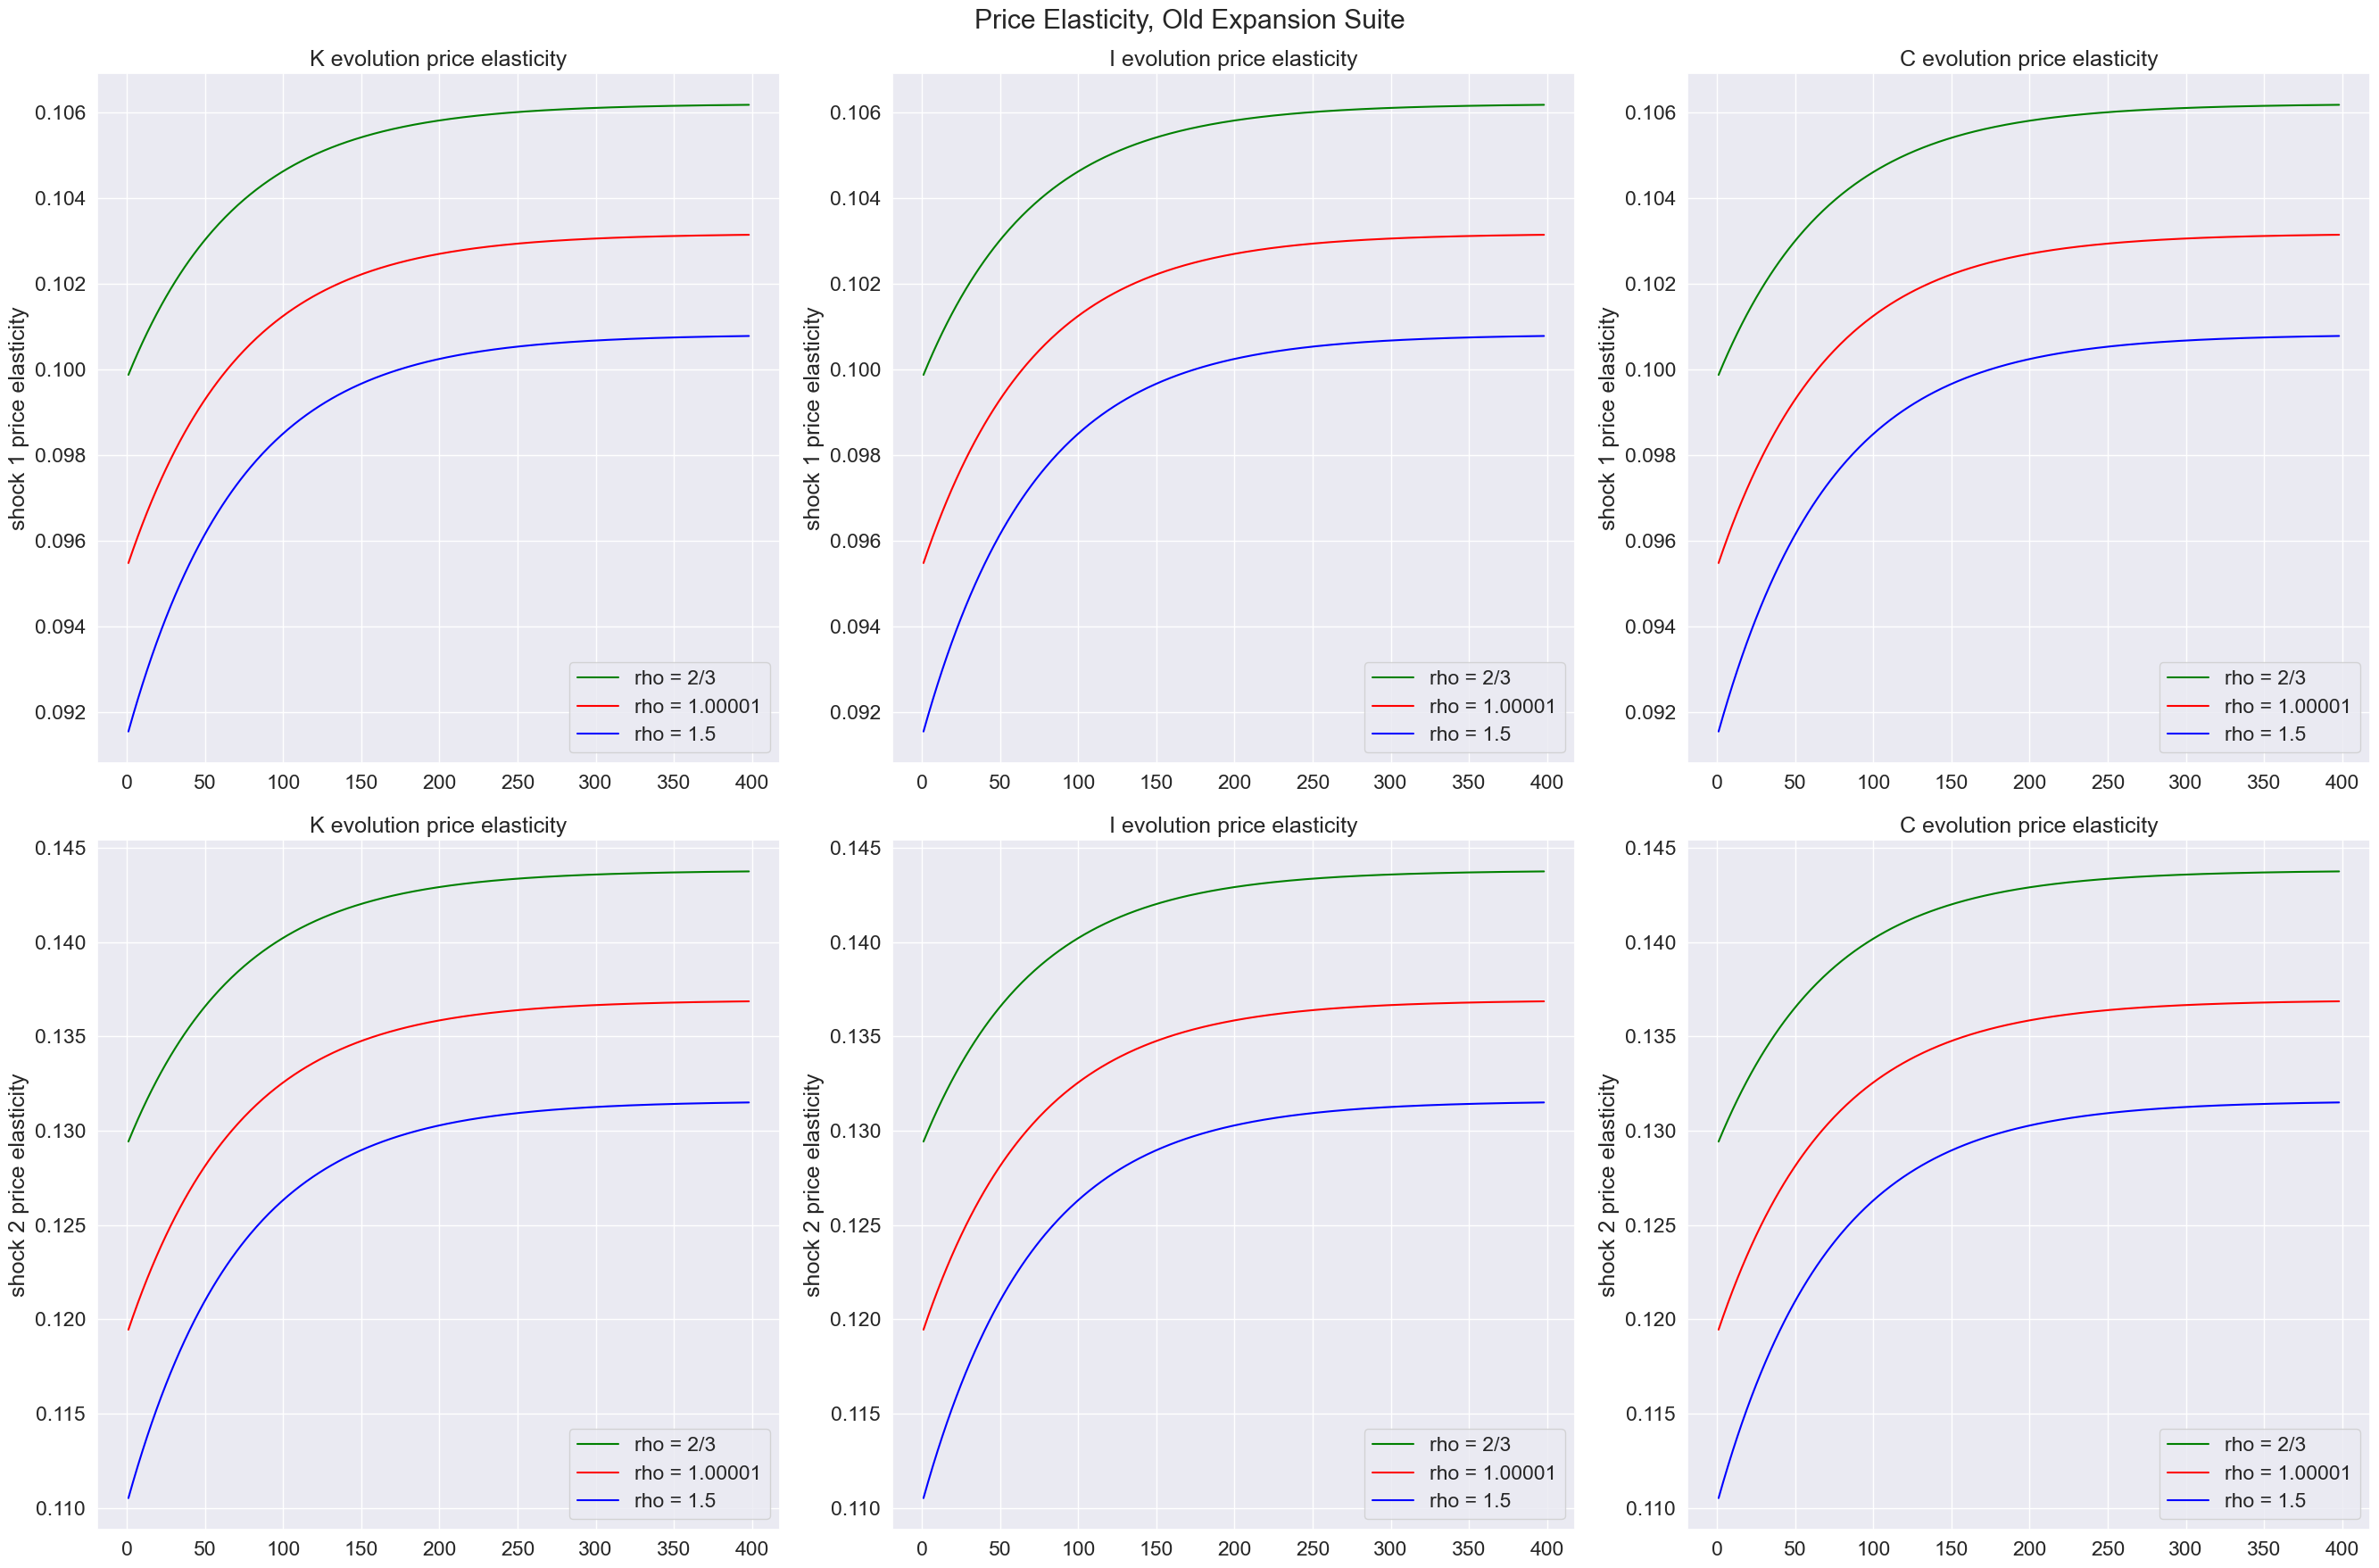

In [20]:
T = 400
fig, axes = plt.subplots(2,3,figsize = (27,18))

for i in range(3):
    for j in range(2):
        el = pd.DataFrame([np.arange(T-1),price_1_old[i][j].flatten(),price_2_old[i][j].flatten(),price_3_old[i][j].flatten()]).T[1:]
        el.columns = ['T','rho = 2/3', 'rho = 1.00001', 'rho = 1.5']
        sns.lineplot(data = el,  x = 'T', y = 'rho = 2/3', ax=axes[j,i], color = 'green',label = 'rho = 2/3')
        sns.lineplot(data = el,  x = 'T', y = 'rho = 1.00001', ax=axes[j,i], color = 'red',label = 'rho = 1.00001')
        sns.lineplot(data = el,  x = 'T', y = 'rho = 1.5', ax=axes[j,i], color = 'blue',label = 'rho = 1.5')
        axes[j,i].set_xlabel('')
        axes[0,i].set_ylabel('shock 1 price elasticity')
        axes[1,i].set_ylabel('shock 2 price elasticity')
        axes[j,0].set_title('K evolution price elasticity')
        axes[j,1].set_title('I evolution price elasticity')
        axes[j,2].set_title('C evolution price elasticity')

fig.suptitle('Price Elasticity, Old Expansion Suite')
fig.tight_layout()